# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [5]:
%%R -o df
 
# Import data with R
df <- read_csv('2023_subway_censusvar.csv')
df %>% head(4)

Rows: 18208 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (28): Common Name, Equipment Description, Executive Comment, Outage Cod...
dbl  (18): GEOID, Outage, Station MRN, Station ID, Complex ID, lat, long, AD...
dttm  (4): Out of Service Date, Estimated Return to Service Date, Actual Ret...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 4 × 50
        GEOID `Out of Service Date` `Common Name` Outage `Equipment Description`
        <dbl> <dttm>                <chr>          <dbl> <chr>                  
1 36005006500 2023-03-15 00:05:00   EL130         819718 ELE: EL130 - 434 - 3 A…
2 36005006500 2023-10-18 05:20:00   EL130         933391 ELE: EL130 - 434 - 3 A…
3 36005006500 2023-10-12 00:27:00   EL130         931244 ELE: EL130 - 434 - 3 A…
4 36005006500 2023-07-26 09:28:00   EL130         899891 ELE:

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [6]:
%%R 
discrete <- c('Common Name', 'Stop Name', 'Borough')

df %>%
    select(discrete) %>%
    pivot_longer(discrete, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    ) %>%
    arrange(desc(count))


`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.
# A tibble: 482 × 3
# Groups:   variable [3]
   variable  value                     count
   <chr>     <chr>                     <int>
 1 Borough   M                         10125
 2 Borough   Bk                         3442
 3 Borough   Q                          2572
 4 Borough   Bx                         2042
 5 Stop Name 181 St                      890
 6 Stop Name Fulton St                   703
 7 Stop Name Lexington Av/63 St          558
 8 Stop Name 47-50 Sts-Rockefeller Ctr   465
 9 Stop Name 168 St-Washington Hts       418
10 Stop Name 191 St                      414
# ℹ 472 more rows
# ℹ Use `print(n = ...)` to see more rows


In addition: Warning message:
Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(discrete)

  # Now:
  data %>% select(all_of(discrete))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


In [8]:
%%R
# rename 'Common Name' to 'common_name'
df <- df %>% rename(common_name = 'Common Name')
df <- df %>% rename(stop_name = 'Stop Name')

# list most commonly occuring elevators
df_subway <- df %>%
    group_by(common_name) %>% 
    summarize(
            median_income= mean(med_earn_estimate), 
            sub_pop=mean(sub_pop_estimate),
            count = n(),
            # stop_name = stop_name,
            # borough = Borough,
            ) %>%
    arrange(desc(count))

# create a new column called frequency to store the count of each elevator
df <- df %>% 
    group_by(common_name) %>% 
    mutate(frequency = n()) %>% 
    ungroup()



In [9]:
%%R

discrete_variables <- c('vs', 'am', 'gear', 'carb')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

mtcars %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    )

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.
# A tibble: 13 × 3
# Groups:   variable [4]
   variable value count
   <chr>    <dbl> <int>
 1 am           0    19
 2 am           1    13
 3 carb         1     7
 4 carb         2    10
 5 carb         3     3
 6 carb         4    10
 7 carb         6     1
 8 carb         8     1
 9 gear         3    15
10 gear         4    12
11 gear         5     5
12 vs           0    18
13 vs           1    14


In addition: Warning message:
Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(discrete_variables)

  # Now:
  data %>% select(all_of(discrete_variables))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


## 1-D visualizations (aka distributions)


### Continuous variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [10]:
%%R
df_subway %>% head(4)

# A tibble: 4 × 4


  common_name median_income sub_pop count
  <chr>               <dbl>   <dbl> <int>
1 EL108               60619    2990   252
2 EL403              167379    1353   204
3 EL234              157177     469   198
4 EL462              101709     477   198


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 637 rows containing non-finite values (`stat_density()`). 



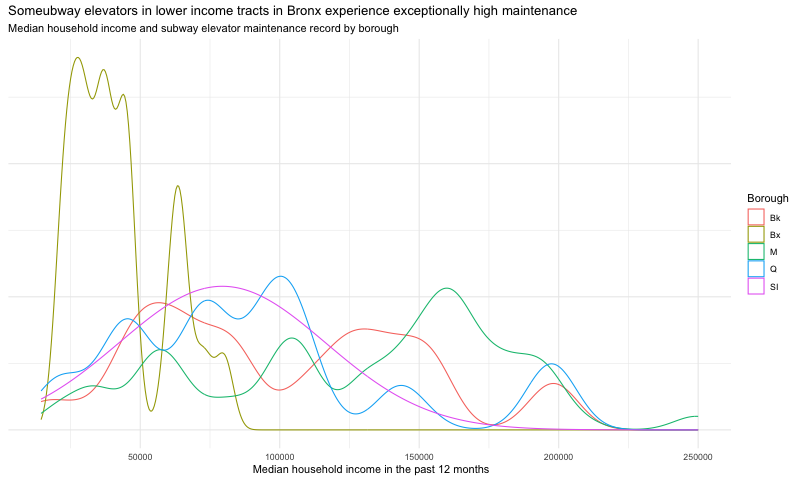

In [19]:
%%R -w 800
# code for plot 1
df %>%
group_by(common_name) %>%
ggplot() +
       aes(x = med_earn_estimate, color=Borough)+
    geom_density() +
    labs(
        title = "Someubway elevators in lower income tracts in Bronx experience exceptionally high maintenance",
        subtitle = "Median household income and subway elevator maintenance record by borough",
        x = " Median household income in the past 12 months",
    ) +
    theme_minimal() +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank()
    ) 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 637 rows containing non-finite values (`stat_boxplot()`). 



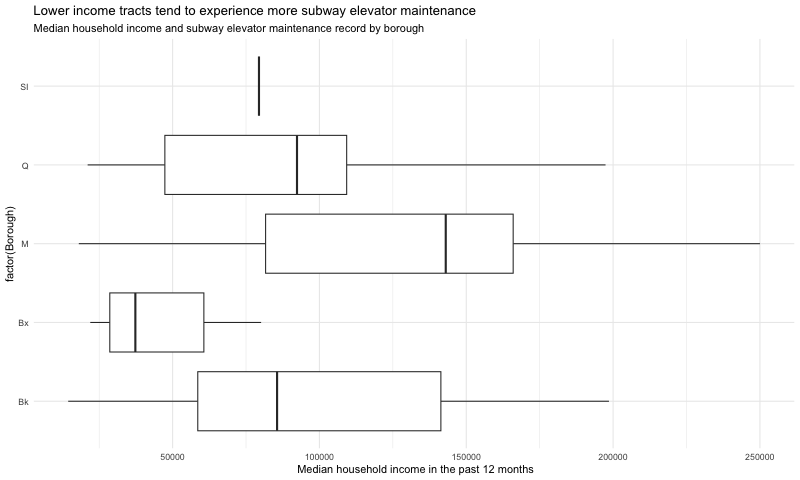

In [17]:
%%R -w 800
# code for plot 2
df %>%
group_by(common_name) %>%
ggplot() +
       aes(x = med_earn_estimate, y=factor(Borough)) +
    geom_boxplot() +
    labs(
        title = "Lower income tracts tend to experience more subway elevator maintenance",
        subtitle = "Median household income and subway elevator maintenance record by borough",
        x = " Median household income in the past 12 months",
    ) +
    theme_minimal() +
    theme(
        axis.ticks.y = element_blank(),
    ) 

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

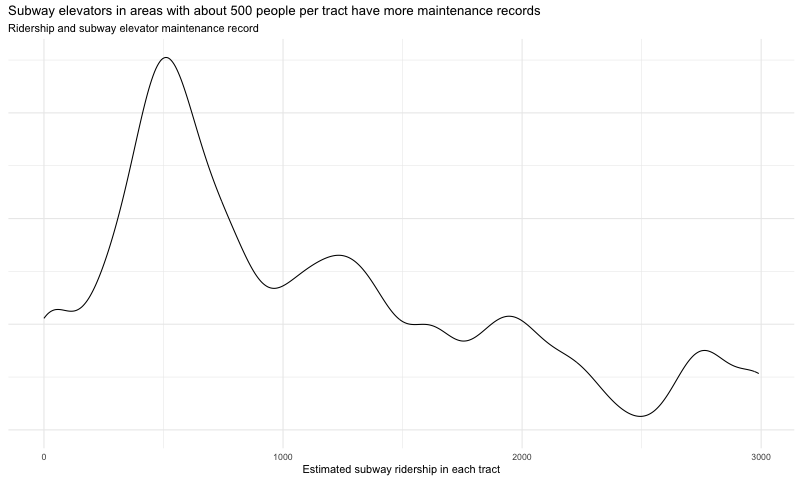

In [14]:
%%R -w 800
# code for plot 1
df %>%
    group_by(common_name) %>%
    ggplot() +
    aes(x = sub_pop_estimate) +
    geom_density() +
    labs(
        title="Subway elevators in areas with about 500 people per tract have more maintenance records",
        subtitle="Ridership and subway elevator maintenance record",
        x="Estimated subway ridership in each tract",
    ) +
    theme_minimal() +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank(),
         ) 